Libary

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans


 Import Csv dan Penggabungan Data

In [4]:
!ls


osn_25.csv  osn.csv  sample_data


In [8]:
with open('osn.csv', 'r', encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())


,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun

0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11,Partisipan,,2016

1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11,Partisipan,,2021

2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11,Emas,,2022

3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11,Partisipan,,2022

4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11,Partisipan,,2022

5,Salwatul Aziza,P,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Astronomi,SMA,SMA,,Partisipan,,2023

6,Muhammad Ali Fadllur Rahman,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Geografi,SMA,SMA,11,Partisipan,,2016

7,Hurun Nazia,P,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kebumian,SMA,SMA,10,Partisipan,,2023

8,Dita Azzuhra,P,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kebumian,SMA,SMA,11,Partisipan,,2024



In [13]:
import pandas as pd

df1 = pd.read_csv(
    'osn.csv',
    engine='python',
    encoding='latin1'
)

df2 = pd.read_csv(
    'osn_25.csv',
    engine='python',
    encoding='latin1',
    on_bad_lines='skip'
)


In [14]:
df = pd.concat([df1, df2], ignore_index=True)
df.shape


(39815, 14)

**Pemahaman Data**

In [18]:
# =========================
# DATA UNDERSTANDING
# =========================
print("=== INFORMASI DATASET ===")
print(f"Jumlah baris & kolom : {df.shape}")
print("\nDaftar Kolom:")
print(df.columns.tolist())

print("\n=== CEK TIPE DATA ===")
df.info()

print("\n=== CEK DATA KOSONG ===")
missing = df.isna().sum()
missing = missing[missing > 0]
print(missing if not missing.empty else "Tidak ada data kosong")

print("\n=== PREVIEW DATA ===")
df.head()


=== INFORMASI DATASET ===
Jumlah baris & kolom : (39815, 14)

Daftar Kolom:
['Unnamed: 0', 'Nama Peserta', 'Gender', 'Sekolah', 'Provinsi', 'Kab/Kota', 'Bidang', 'Jenjang Lomba', 'Jenjang Sekolah', 'Kelas', 'Medali', 'Prize Tambahan', 'Tahun', ';Nama Peserta;Gender;Sekolah;Provinsi;Kab/Kota;Bidang;Jenjang Lomba;Jenjang Sekolah;Kelas;Medali;Prize Tambahan;Tahun']

=== CEK TIPE DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39815 entries, 0 to 39814
Data columns (total 14 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   Unnamed: 0                                                                                                             19327 non-null  float64
 1   Nama Peserta                                          

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun,;Nama Peserta;Gender;Sekolah;Provinsi;Kab/Kota;Bidang;Jenjang Lomba;Jenjang Sekolah;Kelas;Medali;Prize Tambahan;Tahun
0,0.0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,NaN,2016.0,NaN
1,1.0,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,NaN,2021.0,NaN
2,2.0,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,NaN,2022.0,NaN
3,3.0,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,NaN,2022.0,NaN
4,4.0,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,NaN,2022.0,NaN


**Cleanising Data**

In [19]:
# =========================
# DATA CLEANING
# =========================

# Menghapus spasi berlebih pada nama kolom
df.columns = df.columns.str.strip()

# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

# Menghapus baris tanpa informasi penting
df = df.dropna(subset=['Bidang', 'Medali', 'Provinsi'])

# Standarisasi teks
text_cols = ['Gender', 'Bidang', 'Provinsi', 'Jenjang Lomba', 'Medali']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

print("=== SETELAH CLEANING ===")
print(f"Jumlah data bersih : {df.shape}")
df.head()


=== SETELAH CLEANING ===
Jumlah data bersih : (19327, 14)


,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun,;Nama Peserta;Gender;Sekolah;Provinsi;Kab/Kota;Bidang;Jenjang Lomba;Jenjang Sekolah;Kelas;Medali;Prize Tambahan;Tahun
0,0.0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,Sma,SMA,11.0,Partisipan,NaN,2016.0,NaN
1,1.0,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,Sma,SMA,11.0,Partisipan,NaN,2021.0,NaN
2,2.0,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,Sma,SMA,11.0,Emas,NaN,2022.0,NaN
3,3.0,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,Sma,SMA,11.0,Partisipan,NaN,2022.0,NaN
4,4.0,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,Sma,SMA,11.0,Partisipan,NaN,2022.0,NaN


**EDA**

In [20]:
df['Medali'].value_counts()


,count
Medali,
Partisipan,13483
Perunggu,2821
Perak,1902
Emas,987
Harapan,134


In [21]:
df['Bidang'].value_counts()


,count
Bidang,
Matematika,3500
Biologi,1987
Fisika,1977
Ips,1914
Ipa,1518
Kebumian,1492
Informatika,1487
Ekonomi,1480
Astronomi,1450


**# Machine Learning** - Klasifikasi Medali Peserta OSN



```
# This is formatted as code
```



1. Pilih Fitur dan Target

In [23]:
# Fitur yang digunakan
features = [
    'Gender',
    'Bidang',
    'Provinsi',
    'Jenjang Lomba',
    'Tahun'
]

# Target
target = 'Medali'

X = df[features]
y = df[target]


2. Encoding Data Kategorikal

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

y = encoder.fit_transform(y)


/tmp/ipython-input-1384115323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
/tmp/ipython-input-1384115323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
/tmp/ipython-input-1384115323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

3. Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


 Model RandomForest


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

5. Evaluasi Model

In [28]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6220900155199173

Classification Report:

              precision    recall  f1-score   support

           0       0.09      0.05      0.06       197
           1       0.05      0.04      0.04        27
           2       0.74      0.85      0.79      2697
           3       0.16      0.12      0.14       381
           4       0.18      0.12      0.15       564

    accuracy                           0.62      3866
   macro avg       0.25      0.24      0.24      3866
weighted avg       0.56      0.62      0.59      3866



Visualisasi Data

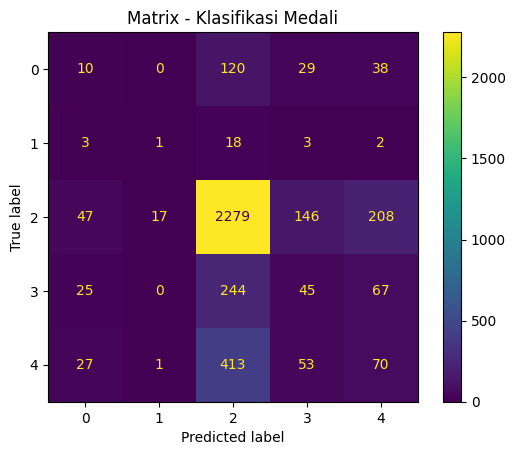

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matrix - Klasifikasi Medali")
plt.show()


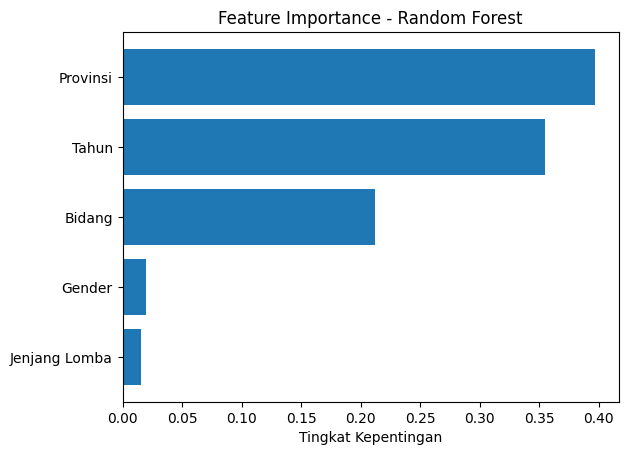

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'Fitur': X.columns,
    'Tingkat Kepentingan': model.feature_importances_
}).sort_values(by='Tingkat Kepentingan', ascending=True)

plt.figure()
plt.barh(importance_df['Fitur'], importance_df['Tingkat Kepentingan'])
plt.xlabel("Tingkat Kepentingan")
plt.title("Feature Importance - Medali OSN")
plt.show()


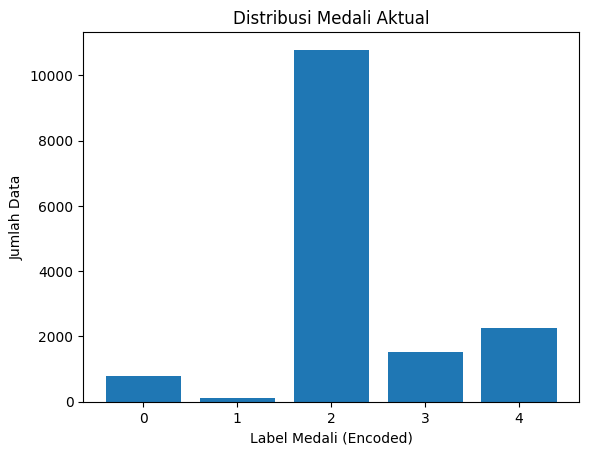

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

jumlah_aktual = pd.Series(y_train.flatten(), name='Medali').value_counts().sort_index()

plt.figure()
plt.bar(jumlah_aktual.index, jumlah_aktual.values)
plt.xlabel("Label Medali (Encoded)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Medali Aktual")
plt.show()


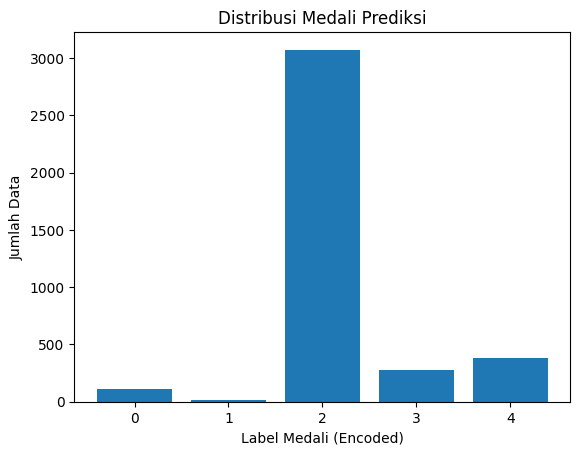

In [38]:
jumlah_prediksi = pd.Series(y_pred).value_counts().sort_index()

plt.figure()
plt.bar(jumlah_prediksi.index, jumlah_prediksi.values)
plt.xlabel("Label Medali (Encoded)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Medali Prediksi")
plt.show()


In [ ]:
Visualisasi - Perbandingan Aktual dan Prediksi

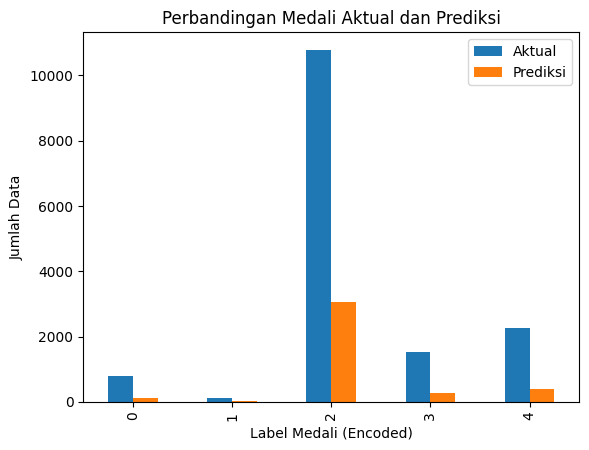

In [39]:
perbandingan = pd.DataFrame({
    'Aktual': jumlah_aktual,
    'Prediksi': jumlah_prediksi
}).fillna(0)

perbandingan.plot(kind='bar')
plt.xlabel("Label Medali (Encoded)")
plt.ylabel("Jumlah Data")
plt.title("Perbandingan Medali Aktual dan Prediksi")
plt.show()


In [29]:
importances = model.feature_importances_
